# Linear regression with Pytorch

## Linear regression 1D: prediction

In [1]:
import torch
torch.__version__

'1.3.1'

Create the following expressions and define the parameters

$$ b = -1, w = 2 $$
$$ \hat{y} = -1 + 2x $$

In [2]:
w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)

In [3]:
def forward(x):
    yhat = w * x + b
    return yhat

Make the following prediction at x = 1
$$ \hat{y} = -1 + 2x \\ \hat{y} = -1 + 2(1) $$

In [4]:
x = torch.tensor([[1.0]])
y_hat = forward(x)
print('The prediction: ', y_hat)

The prediction:  tensor([[1.]], grad_fn=<AddBackward0>)


In [5]:
x = torch.tensor([[1.0], [2.0]])
print('The shape of x: ', x.shape)

The shape of x:  torch.Size([2, 1])


In [6]:
y_hat = forward(x)
print('The prediction: ', y_hat)

The prediction:  tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


In [7]:
x = torch.tensor([[1.0], [2.0], [3.0]])

y_hat = forward(x)
print("prediction: ", y_hat)

prediction:  tensor([[1.],
        [3.],
        [5.]], grad_fn=<AddBackward0>)


## Class Linear

In [8]:
from torch.nn import Linear

In [9]:
torch.manual_seed(1)

In [10]:
lr = Linear(in_features = 1, out_features = 1, bias = True)
print('Paramters w and b: ', list(lr.parameters()))

Paramters w and b:  [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [11]:
print('Python dictionary: ', lr.state_dict())
print('keys: ', lr.state_dict().keys())
print('values: ', lr.state_dict().values())

Python dictionary:  OrderedDict([('weight', tensor([[0.5153]])), ('bias', tensor([-0.4414]))])
keys:  odict_keys(['weight', 'bias'])
values:  odict_values([tensor([[0.5153]]), tensor([-0.4414])])


In [12]:
print('weights: ', lr.weight)
print('bias: ', lr.bias)

weights:  Parameter containing:
tensor([[0.5153]], requires_grad=True)
bias:  Parameter containing:
tensor([-0.4414], requires_grad=True)


In [13]:
x = torch.tensor([[1.0]])
y_hat = lr(x)
print('The prediction: ', y_hat)

The prediction:  tensor([[0.0739]], grad_fn=<AddmmBackward>)


In [14]:
x = torch.tensor([[1.0], [2.0]])
y_hat = lr(x)
print('The prediction: ', y_hat)

The prediction:  tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


In [15]:
x = torch.tensor([[1.0], [2.0], [3.0]])

lr = Linear(in_features = 1, out_features = 1, bias = True)
print('Parameters w and b: ', list(lr.parameters()))
y_hat = lr(x)
print(y_hat)

Parameters w and b:  [Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]
tensor([[ 0.2755],
        [ 0.0816],
        [-0.1122]], grad_fn=<AddmmBackward>)


In [16]:
from torch import nn

In [17]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        out = self.linear(x)
        return out

In [18]:
linear = LR(1, 1)
print('The parameters: ', list(linear.parameters()))
print('Linear model: ', linear.linear)

The parameters:  [Parameter containing:
tensor([[-0.9414]], requires_grad=True), Parameter containing:
tensor([0.5997], requires_grad=True)]
Linear model:  Linear(in_features=1, out_features=1, bias=True)


In [19]:
x = torch.tensor([[1.0]])
y_hat = linear(x)
print('the prediction: ', y_hat)

the prediction:  tensor([[-0.3417]], grad_fn=<AddmmBackward>)


In [20]:
x = torch.tensor([[1.0], [2.0]])
y_hat = linear(x)
print('The prediction: ', y_hat)

The prediction:  tensor([[-0.3417],
        [-1.2832]], grad_fn=<AddmmBackward>)


In [21]:
print('python dictionary: ', linear.state_dict())
print('keys: ', linear.state_dict().keys())
print('values: ', linear.state_dict().values())

python dictionary:  OrderedDict([('linear.weight', tensor([[-0.9414]])), ('linear.bias', tensor([0.5997]))])
keys:  odict_keys(['linear.weight', 'linear.bias'])
values:  odict_values([tensor([[-0.9414]]), tensor([0.5997])])


In [22]:
x = torch.tensor([[1.0], [2.0], [3.0]])

lr = LR(1, 1)
y_hat = lr(x)
print('...and the prediction is!: ', y_hat)

...and the prediction is!:  tensor([[ 0.3030],
        [ 0.0973],
        [-0.1084]], grad_fn=<AddmmBackward>)


## Linear regression 1D: Training

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
class plot_diagram():
    def __init__(self, x, y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.x = x.numpy()
        self.y = y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(x), y) for w.data in self.parameter_values]
    def __call__(self, y_hat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.x, y_hat.detach().numpy())
        plt.plot(self.x, self.y, 'ro')
        plt.xlabel('A')
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title('Data space (top) estimated line (bottom) iteration ' + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel('B')
        plt.figure()
    def __del__(self):
        plt.close('all')

In [25]:
x = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * x

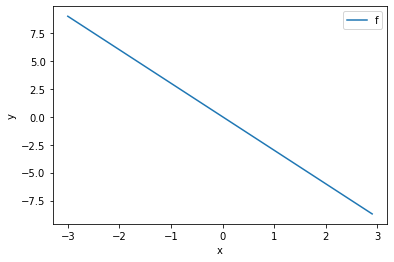

In [26]:
plt.plot(x.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [27]:
y = f + 0.1 * torch.randn(x.size())

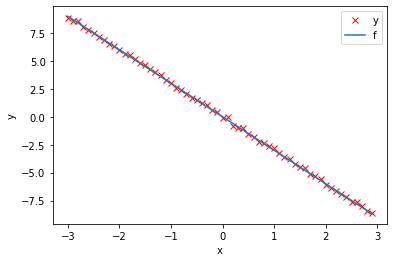

In [28]:
plt.plot(x.numpy(), y.numpy(), 'rx', label = 'y')
plt.plot(x.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [29]:
def forward(x):
    return w * x

In [30]:
def criterion(y_hat, y):
    return torch.mean((y_hat - y) ** 2)

In [31]:
lr = 0.1
losses = []

In [32]:
w = torch.tensor(-10.0, requires_grad = True)

In [33]:
gradient_plot = plot_diagram(x, y, w, stop = 5)

In [34]:
def train_model(iter):
    for epoch in range(iter):
        y_hat = forward(x)
        loss = criterion(y_hat, y)
        gradient_plot(y_hat, w, loss.item(), epoch)
        losses.append(loss.item)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()

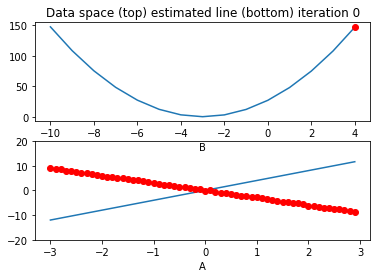

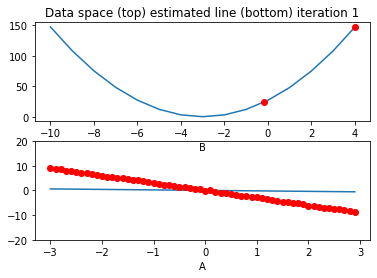

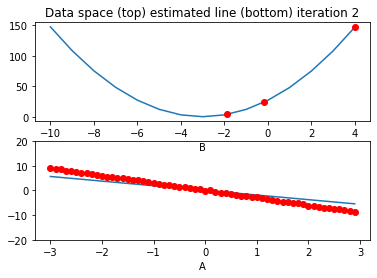

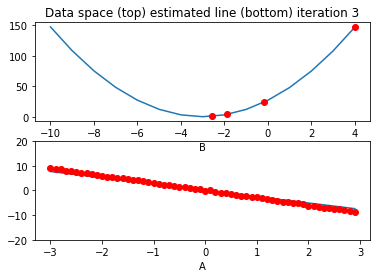

<Figure size 432x288 with 0 Axes>

In [35]:
train_model(4)

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'

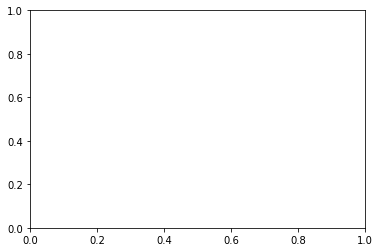

In [36]:
plt.plot(losses)
plt.tight_layout()
plt.xlabel('epoch/iterations')
plt.ylabel('cost')
plt.show()

In [ ]:
w = torch.tensor(-15.0, requires_grad = True)

In [ ]:
losses_2 = []

In [ ]:
def my_train_model(epochs):
    for n in range(epochs):
        y_hat = forward(x)
        loss = criterion(y_hat, y)
        gradient_plot(y_hat, w, loss.item, epoch)
        losses.append(loss.item)
        loss.beckward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()
gradient_plot_1 = plot_diagram(x, y, w, stop = 15)

In [ ]:
plt.plot(losses_2)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [ ]:
class plot_diagram():
    def __init__(self, x, y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.x = x.numpy()
        self.y = y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(x), y) for w.data in self.parameter_values]
        w.data = start
    def __call__(self, y_hat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.x, y_hat.detach().numpy())
        plt.plot(self.x, self.y, 'ro')
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data space (top) estimated line (bottom) iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel('B')
        plt.figure()
    def __del__(self):
        plt.close('all')

In [ ]:
x = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * x

In [ ]:
plt.plot(x.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
y = f + 0.1 * torch.randn(x.size())

In [ ]:
plt.plot(x.numpy(), y.numpy(), 'rx', label = 'y')
plt.plot(x.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
def forward(x):
    return w * x

In [ ]:
def criterion(y_hat, y):
    return torch.mean((y_hat - y) ** 2)

In [ ]:
lr = 0.1
losses = []

In [ ]:
w = torch.tensor(-10.0, requires_grad = True)

In [ ]:
gradient_plot = plot_diagram(x, y, w, stop = 5)

In [ ]:
def train_model(iter):
    for epoch in range(iter):
        y_hat = forward(x)
        loss = criterion(y_hat, y)
        gradient_plot(y_hat, w, loss.item(), epoch)
        losses.append(loss.item())
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()

In [ ]:
train_model(4)

In [ ]:
plt.plot(losses)
plt.tight_layout()
plt.xlabel('epoch/iterations')
plt.ylabel('cost')
plt.show()

In [ ]:
w = torch.tensor(-15.0, requires_grad = True)

In [ ]:
losses_2 = []

In [ ]:
def my_train_model(iter):
    for epoch in range(iter):
        y_hat = forward(x)
        loss = criterion(y_hat, y)
        gradient_plot(y_hat, w, loss.item(), epoch)
        losses_2.append(loss.item())
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()
        
gradient_plot_1 = plot_diagram(x, y, w, stop = 15)

In [ ]:
plt.plot(losses_2)
plt.ylabel('cost')
plt.xlabel('epoch/iterations')
plt.show()

In [ ]:
losses_2

## Training two parameters

In [ ]:
from mpl_toolkits import mplot3d

A class that will help visualize the data space and parameter space

In [ ]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [ ]:
torch.manual_seed(1)

In [ ]:
x = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * x - 1
y = f + 0.1 * torch.randn(x.size())

In [ ]:
plt.plot(x.numpy(), y.numpy(), 'rx', label = 'y')
plt.plot(x.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
def forward(x):
    return w * x + b
def criterion(y_hat, y):
    return torch.mean((y_hat - y)**2)

In [ ]:
get_surface = plot_error_surfaces(15, 13, x, y, 30)

In [ ]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [ ]:
lr = 0.1
loss_bgd = []

In [ ]:
def train_model(iter):
    for epoch in range(iter):
        y_hat = forward(x)
        loss = criterion(y_hat, y)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
        loss_bgd.append(loss)
        loss.backward()
        w.data -= lr * w.grad.data
        b.data -= lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()

In [ ]:
train_model(10)

In [ ]:
get_surface = plot_error_surfaces(15, 13, x, y, 30, go = False)

In [ ]:
x = x

In [ ]:
loss_sgd = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_sgd(iter):
    y_hat = forward(x)
    loss_sgd.append(criterion(y_hat, y).tolist())
    for x, y in zip(x, y):
        y_hat = forward(x)
        loss = driterion(y_hat, y)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        loss.backward()
        w.data -= lr * w.grad.data
        b.data -= lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
    get_surface.plot_ps()

In [ ]:
train_model_sgd(10)

In [ ]:
plt.plot(loss_bgd, label = 'batch gradient descent')
plt.plot(loss_sgd, label = 'stochastic gradient descent')
plt.xlabel('epoch')
plt.ylabel('cost/total loss')
plt.legend()
plt.show()

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [ ]:
dataset = Data()
print('The length of dataset: ', len(dataset))

In [ ]:
x, y = dataset[0]
print('(', x, ', ', y, ')')

In [ ]:
x, y = dataset[0:3]
print('The first 3 x: ', x)
print('The first 3 y: ', y)

In [ ]:
get_surface = plot_error_surfaces(15, 13, x, y, 30, go = False)

In [ ]:
trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [ ]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
loss_loader = []

def train_model_Dataloader(epochs):
    for epoch in range(epochs):
        y_hat = forward(x)
        loss_loader.append(criterion(y_hat, y).tolist())
        for x, y in trainloader:
            y_hat = forward(x)
            loss = criterion(y_hat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data -= lr * w.grad.data
            b.data -= lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()

In [ ]:
train_model_Dataloader(10)

In [ ]:
plt.plot(loss_bgd, label = 'batch gradient descent')
plt.plot(loss_loader, label = 'stochastic gradient descent with dataloader')
plt.xlabel('epoch')
plt.ylabel('cost/total loss')
plt.legend()
plt.show()

In [ ]:
loss = []
w = torch.tensor(-12.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def my_train_model(epochs):
    for epoch in range(epochs):
        y_hat = forward(x)
        loss.append(criterion(y_hat, x))
        for x, y in trainloader:
            y_hat = forward(x)
            loss = criterion(y_hat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data -= lr * w.grad.data
            b.data -= lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()
    my_train_model(10)

## Two parameter mini batch gradient descent

In [ ]:
class plot_error_surfaces(object):
    def __init__(self, w_range, b_range, x, y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = y.numpy()
        self.x = x.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2)**2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor ='none')
            plt.title('Loss surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
        def set_para_loss(self, W, B, loss):
            self.n += 1
            self.W.append(W)
            self.B.append(B)
            self.LOSS.append(loss)
        def final_plot(self):
            ax = plt.axes(projection = '3d')
            ax.plot_wireframe(self.w, self.b, self.Z)
            ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
            plt.figure()
            plt.contour(self.w, self.b, self.Z)
            plt.scatter(self.W, self.B, c = 'r', marker = 'x')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
        def plot_ps(self):
            plt.subplot(121)
            plt.ylim()
            plt.plot(self.x, self.y, 'ro', label = 'training points')
            plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = 'estimated line')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title('Data space iteration: ' + str(self.n))
            plt.subplot(122)
            plt.contour(self.w, self.b, self.Z)
            plt.scatter(self.W, self.B, c = 'r', marker = 'x')
            plt.title('Loss surface contour')
            plt.xlabel('w')
            plt.ylabel('y')
            plt.show()

In [ ]:
import torch
torch.manual_seed(1)

In [ ]:
x = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * x - 1
y = f + 0.1 * torch.randn(x.size())

In [ ]:
plt.plot(x.numpy(), y.numpy(), 'rx', label = 'y')
plt.plot(x.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
def forward(x):
    return w * x + b

In [ ]:
def criterion(y_hat, y):
    return torch.mean((y_hat - y)**2)

In [ ]:
get_surface = plot_error_surfaces(15, 13, x, y, 30)

In [ ]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.1
loss_bgd = []

def train_model_bgd(epochs):
    for epoch in range(epochs):
        y_hat = forward(x)
        loss = criterion(y_hat, y)
        loss_bgd.append(loss)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
        loss.backward()
        w.data -= lr * w.grad.data
        b.data -= lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()

In [ ]:
train_model_bgd(10)

In [ ]:
get_surface = plot_error_surfaces(15, 13, x, y, 30, go = False)

In [ ]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * x - 1
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [ ]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [ ]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
loss_sgd = []
lr = 0.1
def train_model_sgd(epochs):
    for epoch in range(epochs):
        y_hat = forward(x)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(y_hat, y).tolist())
        get_surface.plot_ps()
        loss_sgd.append(criterion(forward(x), y).tolist())
        for x, y in trainloader:
            y_hat = forward(x)
            loss = criterion(y_hat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data -= lr * w.grad.data
            b.data -= lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()

In [ ]:
train_model_sgd(10)

In [ ]:
get_surface = plot_error_surfaces(15, 13, x, y, 30, go = False)

In [ ]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 5)

In [ ]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
loss_mini5 = []
lr = 0.1

def train_model_mini5(epochs):
    for epoch in range(epochs):
        y_hat = forward(x)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(y_hat, y).tolist())
        get_surface.plot_ps()
        loss_mini5.append(criterion(forward(x), y).tolist())
        for x, y in trainloader:
            y_hat = forward(x)
            loss = criterion(y_hat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data -= lr * w.grad.data
            b.data -= lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

In [ ]:
train_model_mini5(10)

In [ ]:
get_surface = plot_error_surfaces(15, 13, x, y, 30, go = False)

In [ ]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 10)

In [ ]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
loss_mini10 = []
lr = 0.1

def train_model_mini10(epochs):
    for epoch in range(epochs):
        y_hat = forward(x)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(y_hat, y).tolist())
        get_surface.plot_ps()
        loss_mini10.append(criterion(forward(x), y).tolist())
        for x, y in trainloader:
            y_hat = forward(x)
            loss = criterion(y_hat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data -= lr * w.grad.data
            b.data -= lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

In [ ]:
train_model_mini10(10)

In [ ]:
plt.plot(loss_bgd, label = 'batch gradient descent')
plt.plot(loss_sgd, label = 'stochastic gradient descent')
plt.plot(loss_mini5, label = 'mini batch gradient descent, batch size: 5')
plt.plot(loss_mini10, label = 'mini batch gradient descent, batch size: 10')
plt.legend()